In [45]:
#import libraries
import pandas as pd

df=pd.read_csv('temp_rec_test.csv')
df.head()


,Date,Time,Day,Tm,H/N/C
0,27.11.2021,8:00:00 AM,Sunday,27C,Normal
1,27.11.2021,9:00:00 AM,Sunday,28C,Normal
2,27.11.2021,10:00:00 AM,Sunday,29C,Normal
3,27.11.2021,11:00:00 AM,Sunday,30C,Normal
4,27.11.2021,12:00:00 PM,Sunday,30C,Normal


In [46]:
# checking data types
df.dtypes

Date     object
Time     object
Day      object
Tm       object
H/N/C    object
dtype: object

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29 entries, 0 to 28
Data columns (total 5 columns):
Date     29 non-null object
Time     29 non-null object
Day      29 non-null object
Tm       27 non-null object
H/N/C    29 non-null object
dtypes: object(5)
memory usage: 1.2+ KB


In [48]:
# rename column
df.rename(columns={'H/N/C':'Status'},inplace=True)

df['Tm']=df['Tm'].str.strip('C')

In [49]:
df.dtypes

Date      object
Time      object
Day       object
Tm        object
Status    object
dtype: object

In [50]:
#check missing values
df.isna().sum()

Date      0
Time      0
Day       0
Tm        2
Status    0
dtype: int64

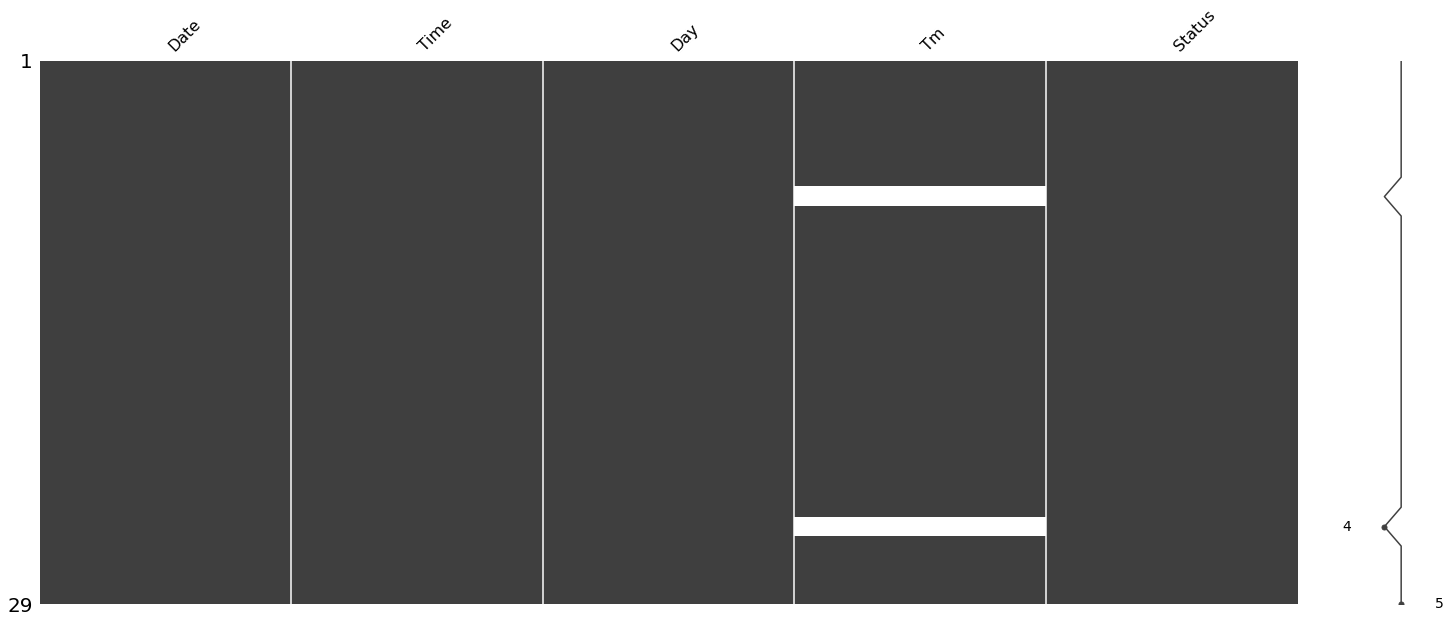

In [51]:
import missingno as msno
import matplotlib.pyplot as plt
msno.matrix(df)
plt.show()


In [52]:
# fill missing values using forward fill
df['Tm']=df['Tm'].fillna(method='ffill')

In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29 entries, 0 to 28
Data columns (total 5 columns):
Date      29 non-null object
Time      29 non-null object
Day       29 non-null object
Tm        29 non-null object
Status    29 non-null object
dtypes: object(5)
memory usage: 1.2+ KB


In [10]:
#check membership of Date
df['Date'].unique()

array(['27.11.2021', '28.11.2021', '28.11.2022'], dtype=object)

In [11]:
#import datetime as dt
toDay=pd.to_datetime('now')
toDay
### Data Type Constraint###
# assert Date is datetime object
#assert df['Date'].dtype=='datetime64[ns]'



Timestamp('2021-12-08 18:27:08.125430')

In [12]:
# convert Date column to pandas date time object
df['Date']=pd.to_datetime(df['Date'])


#assert df['Date'].dtype=='datetime64[ns]'


In [13]:
# Subset Irrelevant Dates
df_subset = df.loc[(df['Date'] > toDay)]
df_subset

,Date,Time,Day,Tm,Status
28,2022-11-28,9:00:00 PM,Monday,28,Normal


In [14]:
#drop the out of range data
df.drop(df[df['Date']>toDay].index,inplace=True)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28 entries, 0 to 27
Data columns (total 5 columns):
Date      28 non-null datetime64[ns]
Time      28 non-null object
Day       28 non-null object
Tm        28 non-null object
Status    28 non-null object
dtypes: datetime64[ns](1), object(4)
memory usage: 1.3+ KB


In [16]:
# check membership of time
df['Time'].unique()

array(['8:00:00 AM', '9:00:00 AM', '10:00:00 AM', '11:00:00 AM',
       '12:00:00 PM', '1:00:00 PM', '2:00:00 PM', '3:00:00 PM',
       '4:00:00 PM', '5:00:00 PM', '6:00:00 PM', '7:00:00 PM',
       '8:00:00 PM', '9:00:00 PM'], dtype=object)

In [17]:
# to make sure 'Tm' column values are integer (Data type constraint)
df['Tm'].sum()

'27282930303133333431322929288385282829303131302929282929'

In [18]:
df['Tm']=df['Tm'].astype('int')
df['Tm'].sum()

943

In [19]:
# check membership of Status
df['Status'].unique()

array(['Normal', 'Hot', 'Hot '], dtype=object)

In [20]:
#value consistency
df['Status'].value_counts()

Normal    20
Hot        6
Hot        2
Name: Status, dtype: int64

In [21]:
df['Status']=df['Status'].str.strip()
df['Status'].value_counts()

Normal    20
Hot        8
Name: Status, dtype: int64

In [22]:
df

,Date,Time,Day,Tm,Status
0,2021-11-27,8:00:00 AM,Sunday,27,Normal
1,2021-11-27,9:00:00 AM,Sunday,28,Normal
2,2021-11-27,10:00:00 AM,Sunday,29,Normal
3,2021-11-27,11:00:00 AM,Sunday,30,Normal
4,2021-11-27,12:00:00 PM,Sunday,30,Normal
5,2021-11-27,1:00:00 PM,Sunday,31,Hot
6,2021-11-27,2:00:00 PM,Sunday,33,Hot
7,2021-11-27,3:00:00 PM,Sunday,33,Hot
8,2021-11-27,4:00:00 PM,Sunday,34,Hot
9,2021-11-27,5:00:00 PM,Sunday,31,Normal


In [23]:
df['Status']=df['Status'].replace(['Hot','Normal'],['1','2'])

In [24]:
df['Status'].unique()

array(['2', '1'], dtype=object)

In [25]:
#change into category type
df['Status']=df['Status'].astype('category')

In [26]:
# Uniqueness
duplicates=df.duplicated(keep=False)
duplicates

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18    False
19    False
20    False
21    False
22    False
23    False
24    False
25    False
26     True
27     True
dtype: bool

In [27]:
df.loc[26:27]

,Date,Time,Day,Tm,Status
26,2021-11-28,8:00:00 PM,Monday,29,2
27,2021-11-28,8:00:00 PM,Monday,29,2


In [28]:
#drop last row
df.drop(27)

,Date,Time,Day,Tm,Status
0,2021-11-27,8:00:00 AM,Sunday,27,2
1,2021-11-27,9:00:00 AM,Sunday,28,2
2,2021-11-27,10:00:00 AM,Sunday,29,2
3,2021-11-27,11:00:00 AM,Sunday,30,2
4,2021-11-27,12:00:00 PM,Sunday,30,2
5,2021-11-27,1:00:00 PM,Sunday,31,1
6,2021-11-27,2:00:00 PM,Sunday,33,1
7,2021-11-27,3:00:00 PM,Sunday,33,1
8,2021-11-27,4:00:00 PM,Sunday,34,1
9,2021-11-27,5:00:00 PM,Sunday,31,2


In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28 entries, 0 to 27
Data columns (total 5 columns):
Date      28 non-null datetime64[ns]
Time      28 non-null object
Day       28 non-null object
Tm        28 non-null float64
Status    28 non-null category
dtypes: category(1), datetime64[ns](1), float64(1), object(2)
memory usage: 2.5+ KB


In [30]:
#Statistics of Tm 
df['Tm'].describe()

count    28.000000
mean     33.678571
std      14.316666
min      27.000000
25%      29.000000
50%      29.500000
75%      31.000000
max      85.000000
Name: Tm, dtype: float64

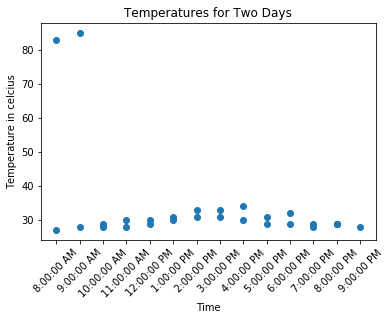

In [31]:
plt.scatter(x='Time',y='Tm',data=df)
plt.title("Temperatures for Two Days")
plt.xlabel('Time')
plt.ylabel('Temperature in celcius')
ax=plt.gca()
ax.set_xticklabels(labels=df['Time'],rotation=45)
plt.show()


In [32]:
# change fahrenheight to celsius
temp_fah=df.loc[df['Tm']>40,'Tm']
temp_cels=(temp_fah-32)*(5/9)
df.loc[df['Tm']>40,'Tm']=temp_cels
assert df['Tm'].max()<40

In [33]:
df.describe()

,Tm
count,28.000000
mean,29.742063
std,1.723729
min,27.000000
25%,28.833333
50%,29.000000
75%,31.000000
max,34.000000


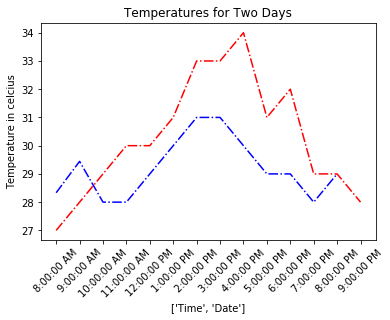

In [34]:
# comparing tow day temperature 
FirstDay=df[df['Date']=='2021-11-27']
SecondDay=df[df['Date']=='2021-11-28']
plt.plot(FirstDay['Time'],FirstDay['Tm'],'-.',color='red')
plt.plot(SecondDay['Time'],SecondDay['Tm'],'-.',color='blue')
plt.title("Temperatures for Two Days")
plt.xlabel(['Time','Date'])
plt.ylabel('Temperature in celcius')
ax=plt.gca()
ax.set_xticklabels(labels=df['Time'],rotation=45)
plt.show()

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=6f6e2c88-220d-4c67-914f-94e653a267a2' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>